In [ ]:
# !kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
# !kaggle datasets download -d ejlok1/cremad

In [ ]:
# !kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee
# !kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

In [8]:
import pandas as pd
import torch
import numpy as np
import torchaudio
import requests
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook
import os


SAVEE = '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/ALL'
RAV =  '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/ravdess-emotional-speech-audio/audio_speech_actors_01-24'
TESS = '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/TESS Toronto emotional speech set data'
CREMA = '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/AudioWAV'


In [9]:
dirlist_SAVEE = os.listdir(SAVEE)
emotion_SAVEE = []
path_SAVEE = []

def PrintThree(filename):
    return filename[-8:-6]


for i in dirlist_SAVEE:
    if PrintThree(i)=='_a':
        emotion_SAVEE.append('male_angry')
    elif PrintThree(i)=='_d':
        emotion_SAVEE.append('male_disgust')
    elif PrintThree(i)=='_f':
        emotion_SAVEE.append('male_fear')
    elif PrintThree(i)=='_h':
        emotion_SAVEE.append('male_happy')
    elif PrintThree(i)=='sa':
        emotion_SAVEE.append('male_sad')
    elif PrintThree(i)=='su':
        emotion_SAVEE.append('male_surprise')
    elif PrintThree(i)=='_n':
        emotion_SAVEE.append('male_neutral') 
    path_SAVEE.append(SAVEE + '/' + i)

SAVEE_df = pd.DataFrame(emotion_SAVEE, columns=['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path_SAVEE, columns=['path'])], axis=1)
SAVEE_df.labels.value_counts()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/devpatelio/Downloads/Coding/Python/pyTorch/audio_mood/ALL'

In [ ]:
dirlist_RAV = os.listdir(RAV)
actor_range = list(range(1, 25))
# for i in actor_range:
#     actor_range[i] = str(i+1)

# for i in actor_range[0:9]:
#     actor_range[i] = str(i+1).zfill(2)
# actor_range[0] = str(actor_range[0]).zfill(2)
# str_actor_range = [str(item) for item in actor_range]
# print(str_actor_range)

gender_RAV = []
emotion_RAV = []
path_RAV = []

for subdir in dirlist_RAV:
    for file in os.listdir(RAV + '/' + subdir):
        if str(file[6:8]) == '01':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_neutral')
        elif str(file[6:8]) == '02':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_calm')
        elif str(file[6:8]) == '03':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_happy')
        elif str(file[6:8]) == '04':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_sad')
        elif str(file[6:8]) == '05':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_angry')
        elif str(file[6:8]) == '06':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_fearful')
        elif str(file[6:8]) == '07':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_disgust')
        elif str(file[6:8]) == '08':
            if int(file[18:20])%2==0:
                temp = 'female'
            else: 
                temp = 'male'
            gender_RAV.append(temp)
            emotion_RAV.append(temp+'_surprised')
        path_RAV.append(RAV + '/' + subdir + '/' + file)
        

RAV_df = pd.DataFrame(emotion_RAV, columns=['labels'])
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df, pd.DataFrame(path_RAV, columns=['path'])], axis=1)
RAV_df.labels.value_counts()


In [ ]:
dirlist_TESS = os.listdir(TESS)
dirlist_TESS.sort()
dirlist_TESS

path_TESS = []
emotion_TESS = []

for i in dirlist_TESS:
    for file in os.listdir(TESS + '/' + i):
        if i == 'OAF_angry' or i=='YAF_angry':
            emotion_TESS.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion_TESS.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion_TESS.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion_TESS.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion_TESS.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion_TESS.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion_TESS.append('female_sad')
        else:
            emotion_TESS.append('Unknown')
        path_TESS.append(TESS + '/' + i + '/' + file)

TESS_df = pd.DataFrame(emotion_TESS, columns=['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df, pd.DataFrame(path_TESS, columns=['path'])], axis=1)
TESS_df.labels.value_counts()


In [ ]:
dirlist_CREMA = os.listdir(CREMA)
dirlist_CREMA.sort()

gender_CREMA = []
emotion_CREMA = []
path_CREMA = []
female_CREMA = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dirlist_CREMA:
    if int(i[0:4]) in female_CREMA:
        temp = 'female'
    else: 
        temp = 'male'
    gender_CREMA.append(temp)
    
    if i[9:12] == 'SAD' and temp == 'male':
        emotion_CREMA.append('male_sad')
    elif i[9:12] == 'SAD' and temp == 'female':
        emotion_CREMA.append('female_sad')
    elif i[9:12] == 'ANG' and temp == 'female':
        emotion_CREMA.append('female_angry')
    elif i[9:12] == 'ANG' and temp == 'male':
        emotion_CREMA.append('male_angry')
    elif i[9:12] == 'DIS' and temp == 'male':
        emotion_CREMA.append('male_disgust')
    elif i[9:12] == 'DIS' and temp == 'female':
        emotion_CREMA.append('female_disgust')
    elif i[9:12] == 'FEA' and temp == 'female':
        emotion_CREMA.append('female_fear')
    elif i[9:12] == 'FEA' and temp == 'male':
        emotion_CREMA.append('male_fear')
    elif i[9:12] == 'HAP' and temp == 'female':
        emotion_CREMA.append('female_happy')
    elif i[9:12] == 'HAP' and temp == 'male':
        emotion_CREMA.append('male_happy')
    elif i[9:12] == 'NEU' and temp == 'female':
        emotion_CREMA.append('female_neutral')
    elif i[9:12] == 'NEU' and temp == 'male':
        emotion_CREMA.append('male_neutral')
    path_CREMA.append(CREMA + '/' + i)
    
CREMA_df = pd.DataFrame(emotion_CREMA, columns=['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(path_CREMA, columns=['path'])], axis=1)
CREMA_df.labels.value_counts()

In [ ]:
dataset = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis=0)
print(dataset.labels.value_counts())
dataset.to_csv("audio_stuff.csv", index=False)

dataset.iloc[1]

In [ ]:
filename = dataset.iloc[796]['path']
wf, sr = librosa.load(filename, res_type='kaiser_fast')
mfcc = librosa.feature.mfcc(y=wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.xlabel('time')
plt.colorbar()
print(dataset.iloc[796]['labels'])


ipd.Audio(filename)
print(wf.shape)
print(mfcc.shape)



filename = dataset.iloc[486]['path']
wf, sr = librosa.load(filename, res_type='kaiser_fast')
mfcc = librosa.feature.mfcc(y=wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(wf, sr=sr)

plt.figure(figsize=(20, 15))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.xlabel('time')
plt.colorbar()
print(dataset.iloc[486]['labels'])

print(wf.shape)
print(mfcc.shape)

In [ ]:
mfcc_list = list()

for filename in dataset['path']:
    wf, sr = librosa.load(filename, res_type='kaiser_fast')
    mfcc = librosa.feature.mfcc(y=wf, sr=sr)
    mfcc_list.append(mfcc)
#     for i in mfcc:
#         empty_mean_mfcc.append(np.array(np.mean(i)))
        


In [ ]:
mfcc_list[0][0]

In [ ]:
mean_list = list()
for i in mfcc_list:
    mean_item = list()
    for x in i: 
        mean_item.append(np.mean(x))
    mean_list.append(mean_item)

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch import optim as optim, functional as F
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

""
for counter, i in enumerate(mean_list):
    for count, x in enumerate(i):
        mean = np.mean(i, axis=0)
        std = np.std(i, axis=0)
        x = (x - mean)/std
        mean_list[counter][count] = x
    

In [ ]:
dataset['mfcc'] = mean_list
dataset.head()

In [ ]:
dataset.to_csv('processed_dataset.csv', index=0)

In [ ]:
labels = []

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch import optim as optim, functional as F
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

label_column = dataset['labels']
labels = (label_column.unique())
one_hot_template = torch.zeros(len(labels), len(labels))

for i in range(0, len(labels)):
    one_hot_template[i][i] = 1

label_encoder_dict = {labels[i]: one_hot_template[i] for i in range(0, len(labels))}
dataset_np = np.array(dataset['mfcc'])
labels_np = np.array(dataset['labels'])


        

combined = []
for counter, x in enumerate(labels_np):
    x = label_encoder_dict[str(x)]
    combined.append(  [dataset_np[counter], x]  )

In [ ]:

for counter, i in enumerate(combined):
    combined[counter][0] = torch.FloatTensor(combined[counter][0])

In [ ]:
import matplotlib.pyplot as plt

categories = labels
count = []

for i in categories:
    count.append(dataset.loc[dataset['labels'] == i, 'labels'].count())

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(categories, count)

In [ ]:
np.random.shuffle(combined)
train_index = int(len(combined)*0.8)
train_set_np = combined[:train_index]
test_set_np = combined[train_index:-1]

from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torch.optim import *
import torchvision
import torchvision.transforms as transforms

trainloader = torch.utils.data.DataLoader(train_set_np, shuffle=True, batch_size = 60)
testloader = torch.utils.data.DataLoader(test_set_np, shuffle=False, batch_size = 60)

train = iter(trainloader)
mfcc_data, label = next(train)


In [ ]:
print(mfcc_data.view(2, -1).shape)

In [ ]:
class Net(nn.Module):
    def __init__ (self):
        super(Net, self).__init__() 
        self.fc1 = nn.Linear(20, 300)
        self.fc2 = nn.Linear(300, 700)
        self.fc3 = nn.Linear(700, 500)
        self.fc4 = nn.Linear(500, 300)
        self.fc5 = nn.Linear(300, 200)
        self.fc6 = nn.Linear(200, 100)
        self.output = nn.Linear(100, 20)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.output(x)
        x = self.softmax(x)
        return x
net = Net()   

In [ ]:
import torch.optim as optim
optimizer_nn = optim.Adam(net.parameters(), lr=0.001)
criterion_nn = nn.MSELoss()
losses_nn = []

epochs = 500
for epoch in range(0, epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer_nn.zero_grad()
        outputs = net(inputs)
#         print('Input', inputs.shape)
#         print('Output', outputs.shape)
        labels = labels.type(torch.FloatTensor)
#         print('Labels', labels.shape)
        loss = criterion_nn(outputs, labels)
        loss.backward()
        optimizer_nn.step()
        running_loss += loss.item()
        losses_nn.append(loss.item())

    print(f"Epoch: {epoch} Training loss: {running_loss/1}")  


print('Finished Training')

In [ ]:
import torch, torch.nn as nn
class LSTM_audio(torch.nn.Module):
    def __init__ (self, audio_dim, hidden_dim):
        super(LSTM_audio, self).__init__()
        self.lstm = nn.LSTM(audio_dim, hidden_dim, batch_first=True) #, bidirectional=True x2 shape
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(0.2)
        self.output = nn.Linear(hidden_dim, audio_dim)
    def forward(self, x):
        x = self.dropout(x)
#         print((x.view(1, len(x), -1)).shape)
#         print(((x.view(1, len(x), -1)).view(-1, 20)).shape)
        lstm_out, (h_t, c_t) = self.lstm((x.view(1, len(x), -1))) ##lstm output
        model_out = self.output(((x.view(1, len(x), -1)).view(-1, 20))) ##linear layer -> 20 values -> 1 hot vector encoding
        output_pred = F.log_softmax(model_out, dim=0) ##softmax
        return output_pred, (h_t, c_t)

In [ ]:
# import torch.optim as optim
# AUDIO_DIM = 20
# HIDDEN_DIM = 20
# lstm_model = LSTM_audio(AUDIO_DIM, HIDDEN_DIM)
# optimizer_lstm = optim.SGD(lstm_model.parameters(), lr=0.001)
# loss_lstm = nn.MSELoss()

# running_loss_lstm = []

# epochs = 50
# for epoch in range(0, epochs):
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         lstm_model.zero_grad()
#         lstm_model.train()
#         inputs, labels = data
# #         print(inputs.shape)
#         optimizer_lstm.zero_grad()
#         outputs, states = lstm_model(inputs)
# #         print(outputs[1])
# #         print(labels[1].shape)
#         labels = labels.type(torch.FloatTensor)
#         losses = loss_lstm(outputs, labels)
#         running_loss_lstm.append(losses.item())

#         losses.backward()
#         optimizer_lstm.step()
#         running_loss += losses.item()
        
#     print(f"Epoch: {epoch} Training loss: {running_loss/60}")  


# print('Finished Training')


In [ ]:
base_model = label_encoder_dict.copy()
# print(basemodel)
acc_dict = {}
for i in categories:
    key = i
    acc_dict.setdefault(key, [base_model[key].tolist()])

In [ ]:
correct_count, all_count = 0, 0
output_probabilities = []

##STILL NEED TO MAKE CONFUSION MATRIX GRID HERE
    

for i, data in enumerate(trainloader, 0):
    inputs, labels = iter(data)
    with torch.no_grad():
        probs = net(inputs.float())
    ps = torch.exp(probs)
    ps = ps.tolist()
    labels = labels.tolist()
    output_probabilities.append(ps)
    m_pred = max(ps)
    m_true = max(labels)
    if (ps.index(m_pred) == labels.index(m_true)):
        correct_count += 1
    all_count += 1
    
print(correct_count/all_count * 100, '%')

In [ ]:
print(acc_dict)

In [ ]:
plt.plot(losses_nn)
plt.title('loss vs epochs')
plt.xlabel('epochs')
plt.ylabel('loss')

In [47]:
keys = []
values = []
for key, value in label_encoder_dict.items():
    keys.append(key)


''

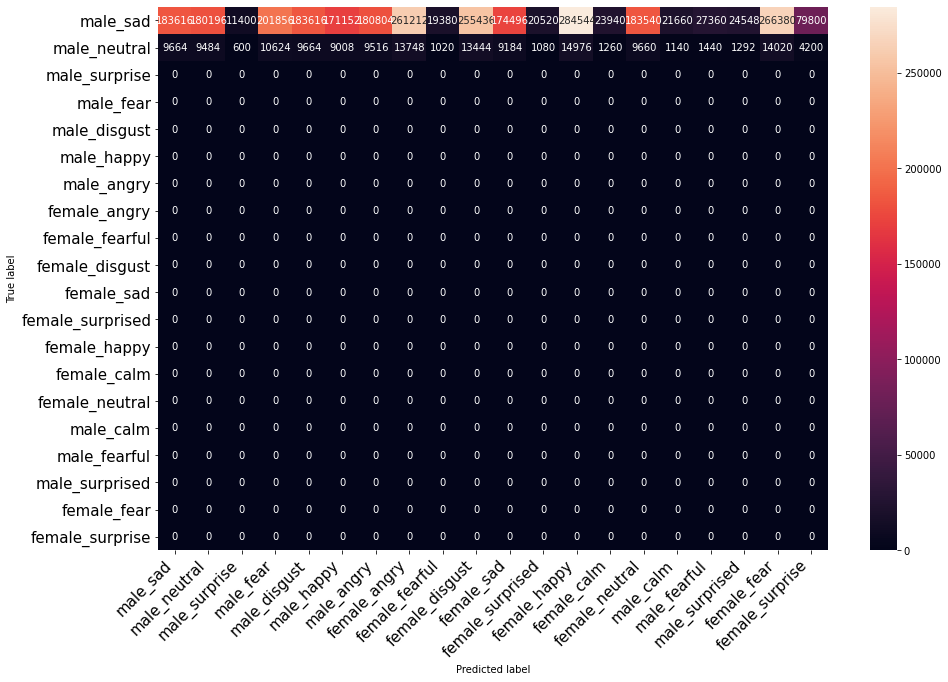

In [48]:
nb_classes = 20
confusion_matrix = np.zeros((nb_classes, nb_classes))
for i, (inputs, classes) in enumerate(testloader):
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        for t in classes.view(-1):
            for p in preds.view(-1):
                confusion_matrix[t.long(), p.long()] += 1

                
import seaborn as sns

plt.figure(figsize=(15,10))

class_names = keys
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
;

0. Pred: tensor([ 4,  5,  4, 14, 17, 18,  3, 14,  4, 19,  6, 10,  3, 14,  5, 12,  4,  3,
        10,  0]), Actual: tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])


In [28]:
!pip install seaborn